In [2]:
import pandas as pd
import numpy as np
ds = pd.read_csv(r"C:\Users\KVarshith\OneDrive - RealPage\Documents\loan approval prediction\loan_data.csv")
df = pd.DataFrame(ds)
df.head(5)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [6]:
#handle the missing values
print(df.isnull().sum())
df["credit_score"].fillna(df["credit_score"].mean(), inplace=True)

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


C:\Users\KVarshith\AppData\Local\Temp\ipykernel_26672\4119267992.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["credit_score"].fillna(df["credit_score"].mean(), inplace=True)


In [13]:
#conversion of categorical variables
from sklearn.preprocessing import LabelEncoder

categorical_features = ["person_gender","person_education","loan_intent","person_home_ownership","previous_loan_defaults_on_file"]
encoder = LabelEncoder()
for col in categorical_features:
    df[col] = encoder.fit_transform(df[col])
print(df.head())

   person_age  person_gender  person_education  person_income  person_emp_exp  \
0   -0.953538              0                 4      -0.104090       -0.892284   
1   -1.118963              0                 3      -0.846005       -0.892284   
2   -0.457264              0                 3      -0.844065       -0.397517   
3   -0.788113              0                 1      -0.007039       -0.892284   
4   -0.622689              1                 4      -0.176371       -0.727362   

   person_home_ownership  loan_amnt  loan_intent  loan_int_rate  \
0                      3   4.024953            4       1.683039   
1                      2  -1.359209            1       0.044782   
2                      0  -0.646600            3       0.625557   
3                      3   4.024953            3       1.417829   
4                      3   4.024953            3       1.095549   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0             4.016394                   -

         Feature  Approved Loans  Rejected Loans
0         Income       -0.254073        0.072592
1   Credit Score       -0.014307        0.004088
2    Loan Amount        0.201515       -0.057576
3  Interest Rate        0.621124       -0.177464


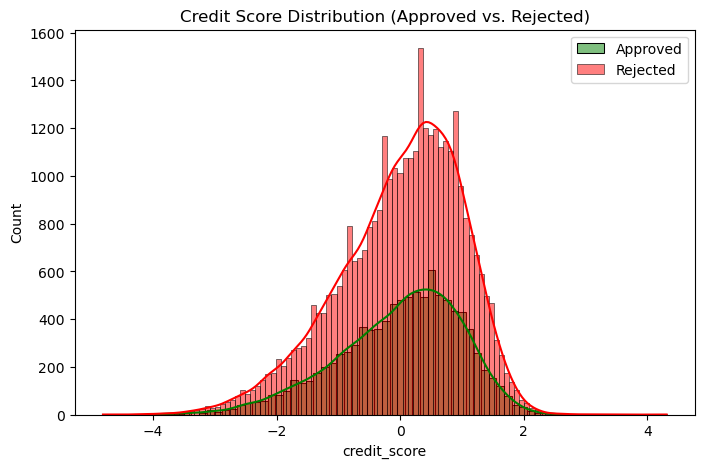

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Group by loan status (1 = Approved, 0 = Rejected)
approved = df[df["loan_status"] == 1]
rejected = df[df["loan_status"] == 0]

# Compare average values
summary = pd.DataFrame({
    "Feature": ["Income", "Credit Score", "Loan Amount", "Interest Rate"],
    "Approved Loans": [approved["person_income"].mean(), approved["credit_score"].mean(), approved["loan_amnt"].mean(), approved["loan_int_rate"].mean()],
    "Rejected Loans": [rejected["person_income"].mean(), rejected["credit_score"].mean(), rejected["loan_amnt"].mean(), rejected["loan_int_rate"].mean()]
})
print(summary)

# Plot Credit Score Distribution
plt.figure(figsize=(8, 5))
sns.histplot(approved["credit_score"], label="Approved", color="green", kde=True)
sns.histplot(rejected["credit_score"], label="Rejected", color="red", kde=True)
plt.legend()
plt.title("Credit Score Distribution (Approved vs. Rejected)")
plt.show()

C:\Users\KVarshith\AppData\Local\Temp\ipykernel_26672\2469483617.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["loan_status"], y=df["loan_amnt"], palette=["red", "green"])


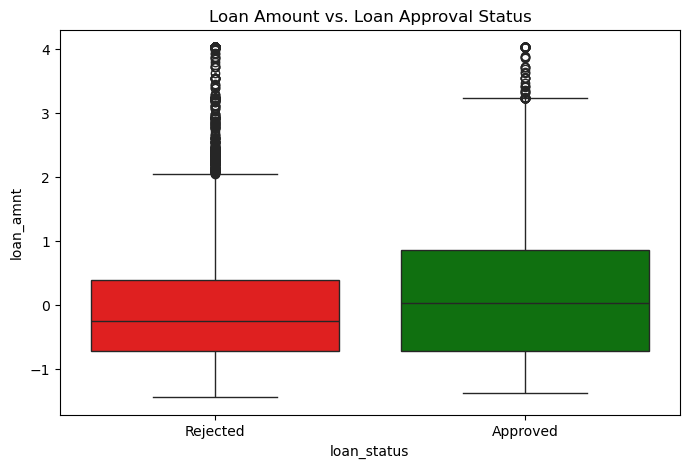

In [16]:
# Loan Amount Comparison
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["loan_status"], y=df["loan_amnt"], palette=["red", "green"])
plt.xticks([0, 1], ["Rejected", "Approved"])
plt.title("Loan Amount vs. Loan Approval Status")
plt.show()

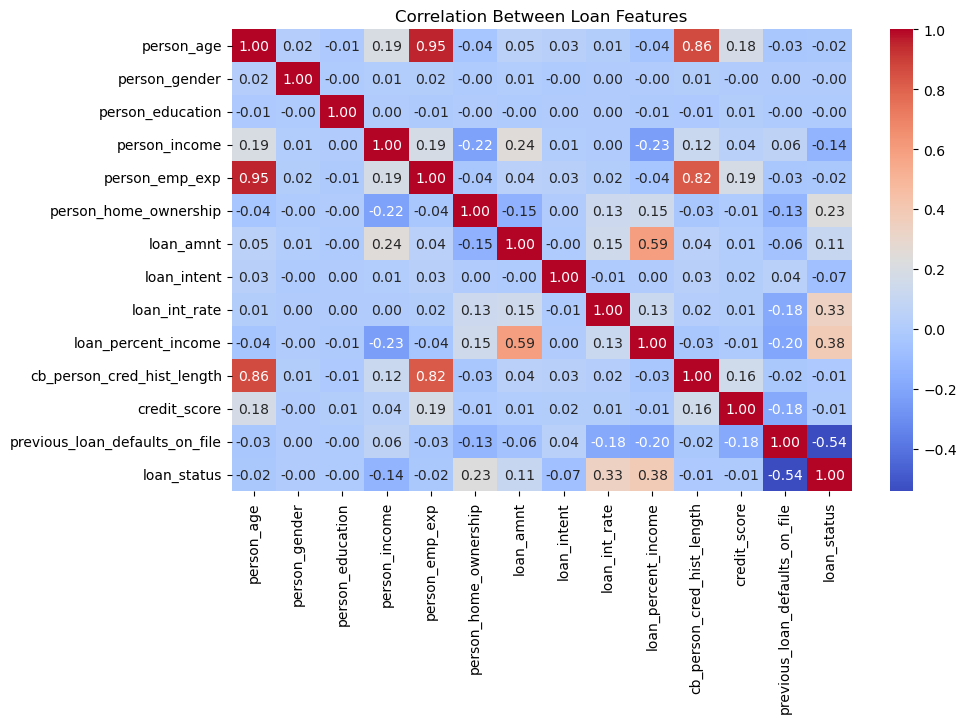

In [17]:
# Heatmap of Feature Correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Loan Features")
plt.show()

In [9]:
#feature extraction and target definition
x = df.drop(columns = ["loan_status"])
y = df["loan_status"]

In [8]:
#normalize the numeric features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_features = ["person_age","person_income","person_emp_exp","loan_amnt","loan_int_rate","loan_percent_income","cb_person_cred_hist_length","credit_score"]
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [21]:
#Train a Ml model for Loan Prediction
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=42)

In [40]:
from sklearn.metrics import classification_report
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(y_pred)
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy_RandomForest: {accuracy:.2f}%")
print(classification_report(y_test, y_pred))

[0 0 1 ... 0 1 0]
Accuracy_RandomForest: 93.39%
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6990
           1       0.89      0.81      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.89      0.90      9000
weighted avg       0.93      0.93      0.93      9000



In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
ly_pred = model.predict(x_test)
print(ly_pred)
accuracy = accuracy_score(y_test, ly_pred) * 100
print(f"Accuracy_LogisticRegression: {accuracy:.2f}%")
print(classification_report(y_test, ly_pred))

[0 0 1 ... 0 1 0]
Accuracy_LogisticRegression: 93.39%
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6990
           1       0.89      0.81      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.89      0.90      9000
weighted avg       0.93      0.93      0.93      9000



In [43]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
xy_pred = model.predict(x_test)
print(xy_pred)
accuracy = accuracy_score(y_test, xy_pred) * 100 
print(f"Accuracy_XGB : {accuracy:.2f}%")
print(classification_report(y_test, xy_pred))

[0 0 1 ... 0 1 0]
Accuracy_XGB : 93.39%
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6990
           1       0.89      0.81      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.89      0.90      9000
weighted avg       0.93      0.93      0.93      9000



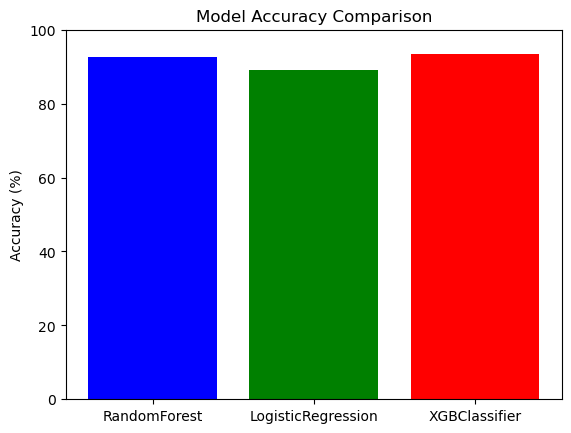

In [50]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Initialize models
rf = RandomForestClassifier()
lr = LogisticRegression()
xgb = XGBClassifier()

models = {"RandomForest": rf, "LogisticRegression": lr, "XGBClassifier": xgb}

# Store results
accuracy_results = {}

# Train models and compute accuracy + classification report
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred) * 100
    accuracy_results[name] = accuracy
# Visualization of accuracy comparison
import matplotlib.pyplot as plt
plt.bar(accuracy_results.keys(), accuracy_results.values(), color=['blue', 'green', 'red'])
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 100)
plt.xticks(rotation=0)
plt.show()


In [ ]:

metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
results = {model_name: [] for model_name in models.keys()}

# Train models and compute metrics
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    results[name].append(accuracy_score(y_test, y_pred) * 100)
    results[name].append(precision_score(y_test, y_pred, average='weighted') * 100)
    results[name].append(recall_score(y_test, y_pred, average='weighted') * 100)
    results[name].append(f1_score(y_test, y_pred, average='weighted') * 100)

# Convert results to DataFrame
df_results = pd.DataFrame(results, index=metrics)

# Print comparison table
print(df_results)
